### Analyzing GPT Categorization

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dir_path = "/users/carolinejung/CS315-proj3-group2/2-analysis/" #CHANGE ME!

In [126]:
category_names = ["civil rights", "culture", "energy and environment", "health, education, and labor",
                  "immigration and international affairs", "housing and social welfare", "defense, law, and crime",
                  "economy, commerce, and transportation", "other"]

female = pd.read_csv(dir_path+"female_categories.csv")
male = pd.read_csv(dir_path+"male_categories_all.csv")

In [230]:
def clean_df(df):
    new_rows = []
    for person in df.iterrows():
        id = person[1]["video_id"]
        description = person[1]["Description"]

        for category in category_names:
            if category in description:
                new_rows.append({"video_id": id, "Description": category})
    
    return pd.DataFrame(new_rows)

def calculate_top_categories(df):
    df_counts = clean_df(df)["Description"].value_counts().to_frame().reset_index()
    num_videos = df.shape[0]
    df_counts["percent"] = df_counts.apply(lambda x: x["count"]/num_videos, axis=1)
    return df_counts

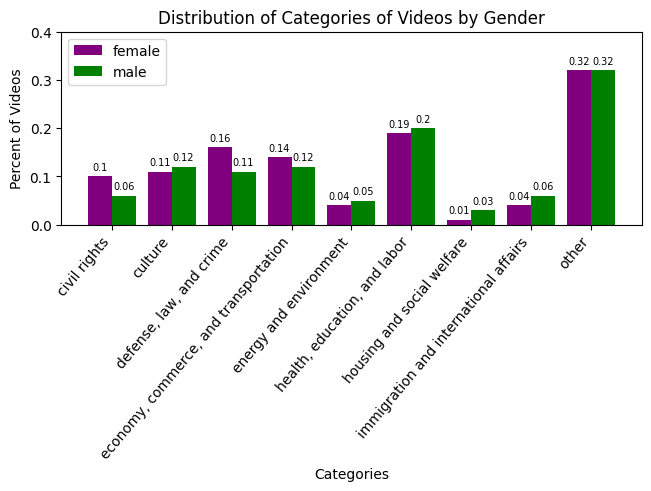

In [227]:
# side by side boxplot
def visualize_categories():
    output_female = calculate_top_categories(female).sort_values("Description")
    output_male = calculate_top_categories(male).sort_values("Description")
    
    categories = sorted(category_names)
    data = {'female': round(output_female["percent"],2),
            'male': round(output_male["percent"],2)}

    x = np.arange(len(categories))  # the label locations
    width = 0.4  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    for gender, percentages in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, percentages, width, label=gender, color=["purple" if gender == "female" else "green"])
        ax.bar_label(rects, padding=3, size=7)
        multiplier += 1

    ax.set_xticks(x + width/2, categories)
    ax.set_ylim(0, 0.4)

    plt.xticks(rotation=50, ha='right')
    plt.xlabel("Categories")
    plt.ylabel("Percent of Videos")
    plt.title(f"Distribution of Categories of Videos by Gender")
    plt.legend(loc='upper left')
    plt.show()

visualize_categories()

### Code Graveyard

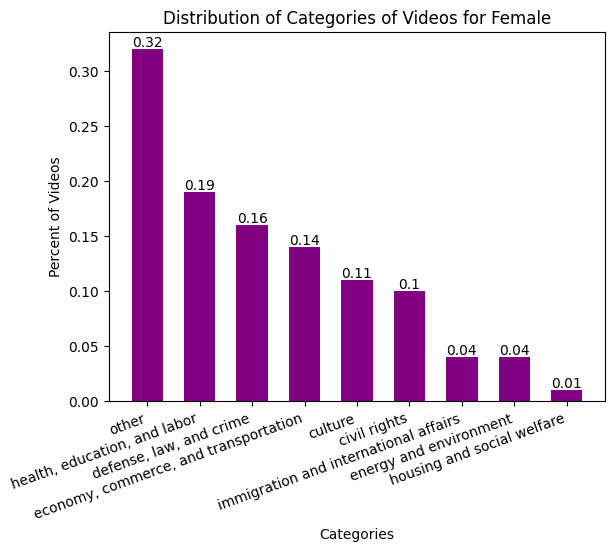

In [229]:
def visualize_categories(df, gender):
    output = calculate_top_categories(df)
    
    bars = plt.bar(output["Description"], round(output["percent"],2), color = "purple", width = 0.6)
    plt.bar_label(bars)
    plt.xticks(rotation=20, ha='right')
    plt.xlabel("Categories")
    plt.ylabel("Percent of Videos")
    plt.title(f"Distribution of Categories of Videos for {gender}")
    plt.show()
    
visualize_categories(female, "Female")